In [1]:
from fastai.vision import *

In [2]:
folder, file = 'black', 'urls_black.txt'

In [13]:
folder, file = 'teddys', 'urls_teddys.txt'

In [3]:
folder, file = 'grizzly', 'urls_grizzly.txt'

In [3]:
path = Path('data/bears')

In [4]:
dest = path/folder

In [5]:
file, dest

('urls_black.txt', PosixPath('data/bears/black'))

In [19]:
dest.mkdir(parents=True, exist_ok=True)

In [22]:
download_images(urls=path/file, dest=dest, max_pics=200)

Error https://www.gotscience.org/wp-content/uploads/2015/08/19532120519_0fcf695d7b_k-e1441158706270.jpg HTTPSConnectionPool(host='www.gotscience.org', port=443): Max retries exceeded with url: /wp-content/uploads/2015/08/19532120519_0fcf695d7b_k-e1441158706270.jpg (Caused by SSLError(SSLError("bad handshake: SysCallError(104, 'ECONNRESET')")))
Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [6]:
classes = ['teddys', 'grizzly', 'black']

In [26]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000199.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000112.jpg'>
Image data/bears/teddys/00000140.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000016.jpg'>
Image data/bears/teddys/00000127.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000086.jpg'>
Image data/bears/teddys/00000181.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000013.jpg'>
Image data/bears/teddys/00000062.gif has 1 instead of 3 channels
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000143.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000099.jpg'>
Image data/bears/grizzly/00000088.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000025.jpg'>
Image data/bears/grizzly/00000155.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000130.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000059.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000100.jpg'>
black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000155.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/bears/black/00000126.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000040.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000179.jpg'>
Image data/bears/black/00000009.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/bears/black/00000002.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000131.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000039.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000023.jpg'>


In [7]:
len((path/'black').ls()), len((path/'grizzly').ls()), len((path/'teddys').ls())

(189, 190, 189)

In [8]:
data = ImageDataBunch.from_folder(path, valid_pct=.2, ds_tfms=get_transforms(), size=224, num_workers=4
                                 ).normalize(imagenet_stats)

In [9]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (452 items)
[Category black, Category black, Category black, Category black, Category black]...
Path: data/bears
x: ImageItemList (452 items)
[Image (3, 318, 480), Image (3, 249, 372), Image (3, 333, 500), Image (3, 281, 500), Image (3, 305, 260)]...
Path: data/bears;

Valid: LabelList
y: CategoryList (112 items)
[Category black, Category black, Category black, Category grizzly, Category teddys]...
Path: data/bears
x: ImageItemList (112 items)
[Image (3, 500, 342), Image (3, 281, 500), Image (3, 399, 500), Image (3, 334, 500), Image (3, 499, 427)]...
Path: data/bears;

Test: None

> What is `num_workers`? And why are all the images printed above all still larger than 224 when I specified `size=224`?

In [10]:
data.classes

['black', 'grizzly', 'teddys']

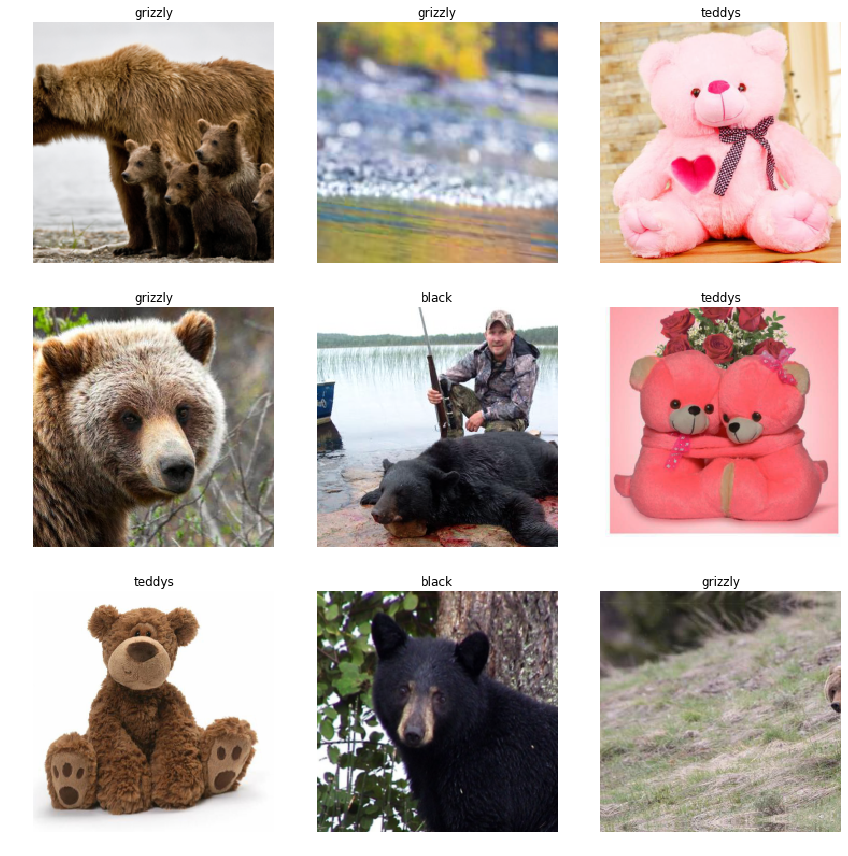

In [11]:
data.show_batch(rows=3)

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 452, 112)

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.021026,0.234111,0.062500
2,0.553576,0.132085,0.053571
3,0.390004,0.118986,0.044643
4,0.295226,0.113168,0.044643


In [40]:
learn.save('stage-1')

In [15]:
learn.load('stage-1');

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


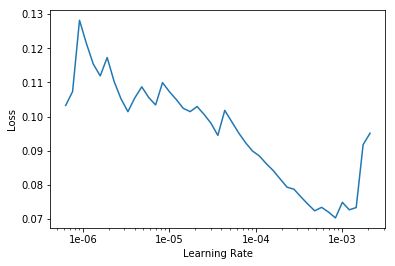

In [18]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.113058,0.060175,0.026786
2,0.097646,0.058348,0.026786


In [22]:
learn.save('stage-2')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

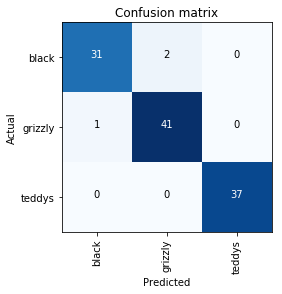

In [24]:
interp.plot_confusion_matrix()

In [25]:
from fastai.widgets import *

In [44]:
ds, idxs = DatasetFormatter.from_toplosses(learn, ds_type=DatasetType.Valid)

In [45]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [46]:
ds, idxs = DatasetFormatter.from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [48]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
data = ImageDataBunch.from_folder()

In [ ]:
data = ImageDataBunch.from_folder(path, valid_pct=.2, ds_tfms=get_transforms(), size=224, num_workers=4
                                 ).normalize(imagenet_stats)

In [60]:
data = ImageDataBunch.from_csv(path, valid_pct=.2, csv_labels='cleaned.csv', ds_tfms=get_transforms(),
                        size=224, num_workers=4).normalize(imagenet_stats)

In [61]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [63]:
learn.load('stage-2');

In [64]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.054085,0.014923,0.000000
2,0.064364,0.012925,0.000000


In [65]:
interp = ClassificationInterpretation.from_learner(learn)

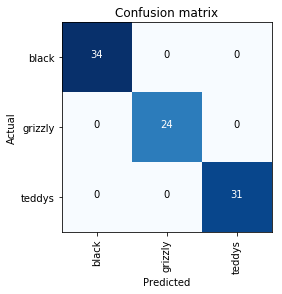

In [66]:
interp.plot_confusion_matrix()

> Too good, right?  What is the correct way to use 'cleaned.csv'?

In [17]:
learn.load('stage-2');

In [18]:
learn.export()

In [21]:
path.ls()

[PosixPath('data/bears/cleaned.csv'),
 PosixPath('data/bears/urls_teddys.txt'),
 PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_grizzly.txt'),
 PosixPath('data/bears/.ipynb_checkpoints'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_black.txt')]

In [23]:
defaults.device = torch.device('cpu')

In [24]:
defaults.device

device(type='cpu')

In [26]:
img = open_image(path/'black'/'00000021.jpg')

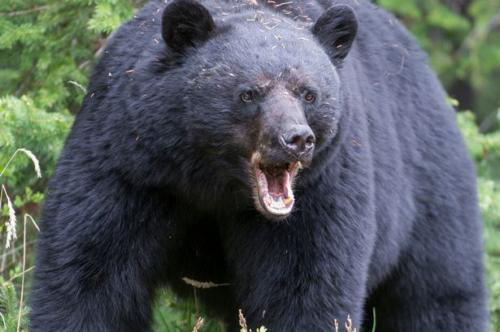

In [27]:
img

In [28]:
learn = load_learner(path)

In [32]:
pred_class, pred_idx, outputs = learn.predict(img)

In [34]:
pred_class, pred_idx, outputs

(Category black, tensor(0), tensor([9.8312e-01, 1.6844e-02, 3.5767e-05]))

In [36]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [37]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate
1,16.609451,259971472.000000,0.651786


In [43]:
defaults.device = torch.device('cuda')

In [44]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [45]:
learn.fit_one_cycle(6, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate
1,1.606817,1.304230,0.651786
2,1.555032,1.242095,0.687500
3,1.517412,1.208832,0.705357
4,1.506971,1.182616,0.687500
5,1.469346,1.168648,0.678571
6,1.453149,1.168149,0.669643


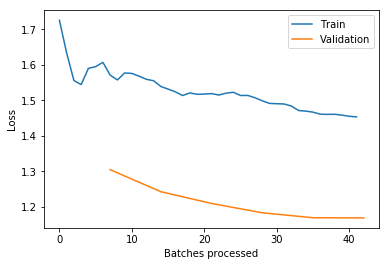

In [46]:
learn.recorder.plot_losses()

In [48]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [49]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.962389,0.939211,0.526786


In [50]:
data = ImageDataBunch.from_folder(path, valid_pct=0.9, bs=32, size=224, num_workers=4,
                                  ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0,)
                                 ).normalize(imagenet_stats)

In [52]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)

In [53]:
learn.unfreeze()

In [54]:
learn.fit_one_cycle(40, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.474086,0.999366,0.495069
2,1.376247,0.999857,0.508876
3,1.320163,0.997884,0.510848
4,1.315792,0.982660,0.508876
5,1.289104,0.958413,0.499014
6,1.252327,0.921787,0.445759
7,1.206773,0.874721,0.400394
8,1.143367,0.813442,0.349112
9,1.069734,0.747647,0.289941
10,1.008848,0.677240,0.222880
